# Copyright 2022 Cognite AS
## Authentication

- Instantiating a `CogniteClient` using different methods:
  - Interactive login
  - Using device code
  - Using client credentials
- Checking the login status

### Prerequisites

Make sure you have installed all the required packages!
This can be done by running:

```poetry install```

...in your terminal.

You need to specify the values for the following configuration parameters:
 * `Tenant ID` - the ID of the Azure AD tenant where the user is registered.
 * `Client ID` - the ID of the application in Azure AD.
 * `Cluster` - the cluster where your CDF project is installed. For example, api and westeurope-1.
 * `CDF project` - the name of the CDF project.

If you don't know which values to use for these variables, contact your CDF administrator or Cognite Support.

You can directly set the values for these parameters here or read as environment variables or from file.

# Declaring the Global variables which is generic

In [1]:
TENANT_ID = "48d5043c-cf70-4c49-881c-c638f5796997"
CLIENT_ID = "fab52bb5-9de2-4f9e-aefa-712da4b5fe00"
CDF_CLUSTER = "westeurope-1"
COGNITE_PROJECT = "ds-basics"
BASE_URL = f"https://{CDF_CLUSTER}.cognitedata.com"

### Authenticate with user credentials
You can authenticate the Python SDK with Azure AD by using a token retrieved with user credentials.

#### 1. Interactive Login
You can get the token by letting the user sign in interactively via a browser and use the authenticate with interactive login and token refresh flow to access CDF when you're running short-term scripts or using Jupyter.

In [2]:
from cognite.client.credentials import OAuthInteractive
from cognite.client import CogniteClient, ClientConfig

In [3]:
credentials = OAuthInteractive(
    authority_url=f"https://login.microsoftonline.com/{TENANT_ID}",
    client_id=CLIENT_ID,
    scopes=[f"{BASE_URL}/.default"],
)
config = ClientConfig(
    client_name="Cognite Academy course taker custom",
    project=COGNITE_PROJECT,
    base_url=BASE_URL,
    credentials=credentials,
)
client = CogniteClient(config)

We can verify that we have connected to CDF by checking the `token/inspect` endpoint.

The respones is quite large, so we loop through and only pick out the actual CDF projects we have access to:

### Listing the list of project access

In [4]:
response = client.iam.token.inspect()
[proj.url_name for proj in response.projects]

['ds-basics',
 'learn',
 'learn-to-demo-cdf',
 'learn-cdf',
 'cognite-charts',
 'ds-cognitefunctions']

# You may skip the rest of this notebook
We will now go through a couple of other ways to authenticate towards CDF. They are **not necessary** to understand in order to finish this course, so going through them is **optional**!

-----

#### 2. Using Device Code
If a browser is not available, for example, if you are logged into a terminal, you can use the authenticate device code flow to do the authentication from a different device (like your phone)

In [5]:
from cognite.client.credentials import OAuthDeviceCode

In [6]:
credentials = OAuthDeviceCode(
    authority_url=f"https://login.microsoftonline.com/{TENANT_ID}",
    client_id=CLIENT_ID,
    scopes=[f"{BASE_URL}/.default"],
)
config = ClientConfig(
    client_name="Cognite Academy course taker",
    project=COGNITE_PROJECT,
    base_url=BASE_URL,
    credentials=credentials,
)
client = CogniteClient(config)

On our first call to CDF, the device code login flow will trigger. You will see a message pop up saying something like:

*Device code: To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code DXXXXXX to authenticate.*

If you are on a laptop, then you can of course just complete this from the same device, but that is of course not the use case for this way of authenticating.

In [9]:
response = client.iam.token.inspect()

In [ ]:
# Once completed, we can verify that we are connected to CDF:
[proj.url_name for proj in response.projects]

### Authenticate with client credentials

For long-running jobs, like an extractor or a use case, we do want to use a pre-shared secret, a so-called "client secret" to allow it to connect without any human intervention.

These secrets must be treated with great care as they grant access for a long period of time (as opposed to token-based auth methods, like those above, which typically run out after an hour).

**Store it safely in a password manager.**

In [ ]:
from getpass import getpass
CLIENT_SECRET = getpass("Enter the Client Secret: ")  # Enter the client secret interactively here

*If you have not recevied a client secret, and want to try it out, contact your Academy Instructor (or CDF administrator or Cognite Support)*

In [ ]:
from cognite.client.credentials import OAuthClientCredentials

credentials = OAuthClientCredentials(
    token_url=f"https://login.microsoftonline.com/{TENANT_ID}/oauth2/v2.0/token", 
    client_id=CLIENT_ID, 
    scopes=[f"{BASE_URL}/.default"], 
    client_secret= CLIENT_SECRET
)
config = ClientConfig(
    client_name="Cognite Academy course taker",
    project=COGNITE_PROJECT,
    base_url=BASE_URL,
    credentials=credentials,
)
client = CogniteClient(config)

Granted our credentials are correct, we are now instantly authenticated:

In [ ]:
response = client.iam.token.inspect()
[proj.url_name for proj in response.projects]

### CDF Grafana

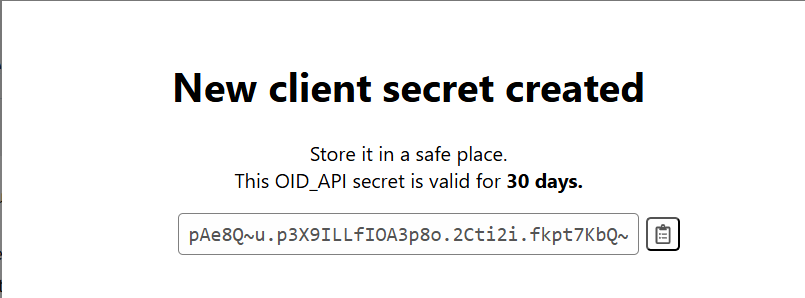